In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

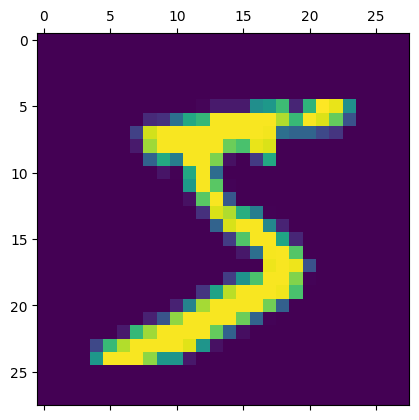

In [5]:
plt.matshow(x_train[0])

In [6]:
x_train = x_train / 255
x_test = x_test / 255

In [7]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [8]:
x_train_flattened.shape

(60000, 784)

In [9]:
x_test_flattened.shape

(10000, 784)

In [10]:
model = keras.Sequential([
            keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
        ])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4736 - accuracy: 0.8755
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3041 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2834 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2737 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2665 - accuracy: 0.9254


In [11]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2728 - accuracy: 0.9240


[0.2728036344051361, 0.9240000247955322]

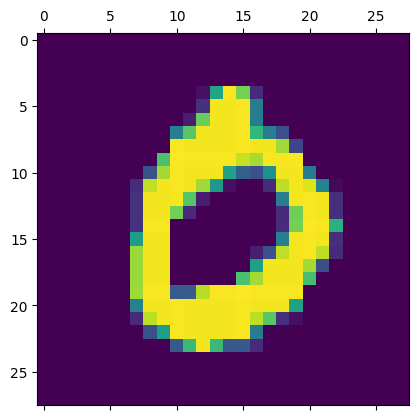

In [12]:
plt.matshow(x_test[3])

In [13]:
y_pred = model.predict(x_test_flattened)

np.argmax(y_pred[3])

313/313 [==============================] - 1s 2ms/step


0

In [14]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [15]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)

Text(95.72222222222221, 0.5, 'Actual')

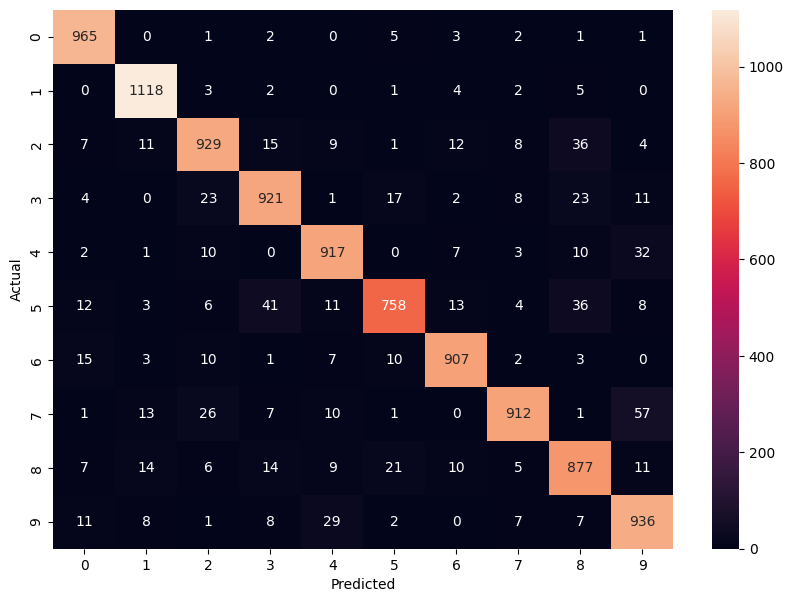

In [16]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [17]:
model = keras.Sequential([
            keras.layers.Dense(100,input_shape=(784,),activation='relu'),
            keras.layers.Dense(10,activation='sigmoid')
        ])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2745 - accuracy: 0.9216
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1261 - accuracy: 0.9628
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0897 - accuracy: 0.9730
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0685 - accuracy: 0.9789
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0558 - accuracy: 0.9823


In [18]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0790 - accuracy: 0.9746


[0.07895300537347794, 0.9746000170707703]

In [19]:
y_pred = model.predict(x_test_flattened)

np.argmax(y_pred[3])
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Actual')

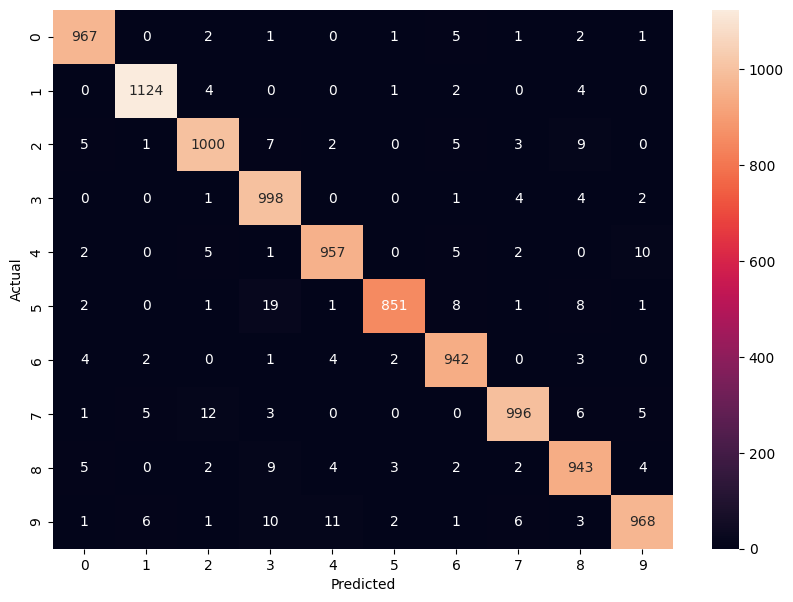

In [20]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')